<a href="https://colab.research.google.com/github/akprodromou/DWS101-Machine-Learning/blob/main/ML_Project_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Supervised Learning

## Import Libraries

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
# I import this additionally for my calculations later on
from sklearn.metrics import mean_squared_error, mean_absolute_error
# I add the Lasso model for question 2.3
from sklearn.linear_model import Lasso

## Question 1
### Load Dataset

In [316]:
df = pd.read_csv('diabetes.csv')
# Let's have a look at the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [317]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [319]:
# I'll store the column names in a variable, to use later on
column_names = df.columns
column_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Plot Variables

### Feature variables (χαρακτηριστικά)

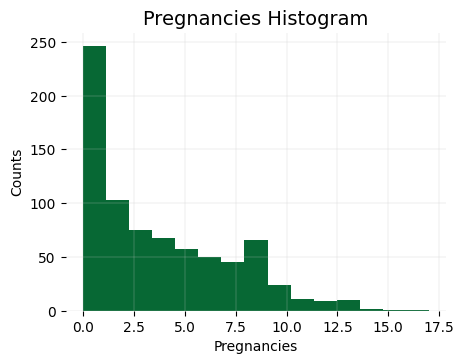

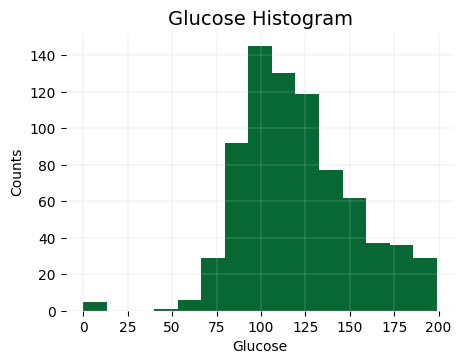

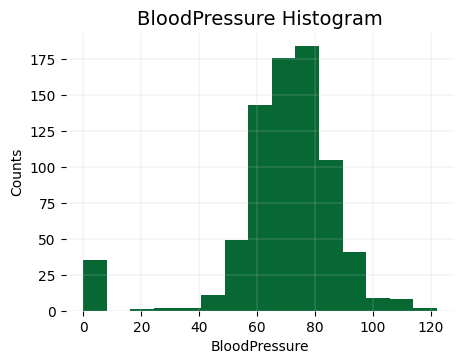

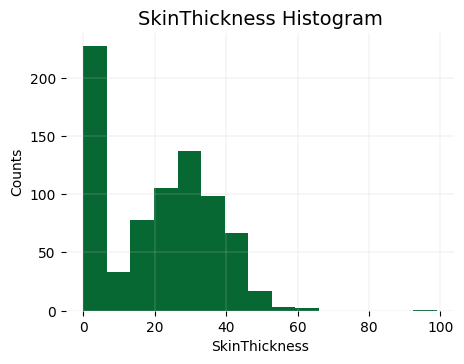

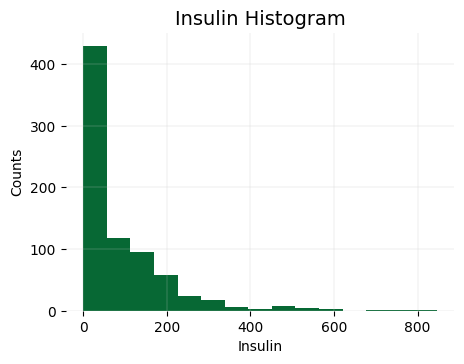

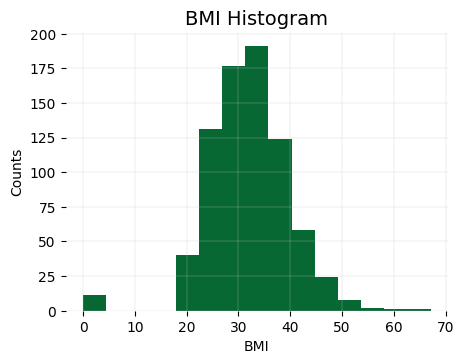

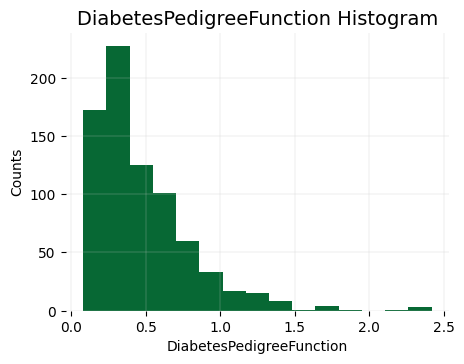

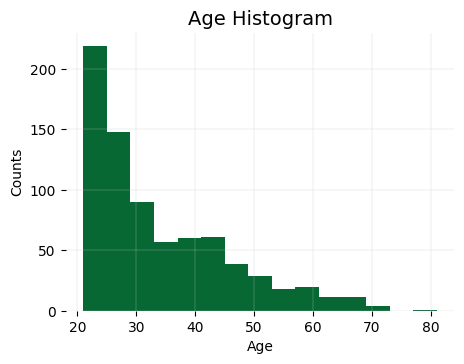

In [320]:

# I'll create a for loop to plot, excluding the target variable:
for column in column_names[:-1]:
  # I change the chart size to smaller, so they can be better visible on screen
  fig = plt.figure(figsize=(5,4))
  df[f'{column}'].hist(bins=15, color="#076834")
  plt.title(f'{column} Histogram', fontsize=14)
  plt.xlabel(f'{column}')
  plt.ylabel('Counts')
  # I turn off the box and change grid color and thickness for aesthetic reasons
  plt.box(on=False)
  plt.grid(visible=True, color="#c5c5c5", linewidth=0.2)
  plt.tight_layout(pad=2.0)
  plt.show()

### Comments (Θεωρείτε πως η ποιότητα των δεδομένων είναι καλή ή κακή)

- Pregnancies: We see values above 2.5, some reaching even 15! Perhaps it includes abortions but still, not a very reasonable number for humans.
- Glucose: We've got ~5 values equal to zero. The distribution appears normal. According to literature, the average glucose falls between 70–99. The average here appears to be ~125, which would make sense if we are examining patients with a likelihood of developing diabetes.
- Blood pressure: Around 30 values are zero, the distribution is normally distributed which is good. This is probabley diastolic pressure (since it seems to have an average of ~75mmHg).
- Insuline: According to literature, *It is typically considered that insulin levels less than 10 uIU/mL are optimal, while levels above 40 uIU/mL could indicate insulin resistance*. In this case we have a mean of 79 uIU/mL; this  *can be a sign of insulin resistance, where the body isn't using insulin effectively*.
- Skin thickness: Over 200 zero values. The rest of the values are also normally distributed.
- Age and DiabetesPetigree are skewed to the right

I'll write a for loop to check:
* the number of zero values in each column
* if there are na values, too

### Τι κατανομή ακολουθεί η μεταβλητή Age;

It's a normal distribution, skewed to the right. It has an average value of 33. As, according to literature, the average diagnosis of diabetes is at 45 years old, we could perhaps expect a dataset of a higher average age for better results.

In [321]:
for column in column_names:
  null_no = (df[f'{column}']==0).sum()
  print(f"{column} has {null_no} zero values")
  na_no = df[f'{column}'].isna().sum()
  print(f"{column} has {na_no} na values")

Pregnancies has 111 zero values
Pregnancies has 0 na values
Glucose has 5 zero values
Glucose has 0 na values
BloodPressure has 35 zero values
BloodPressure has 0 na values
SkinThickness has 227 zero values
SkinThickness has 0 na values
Insulin has 374 zero values
Insulin has 0 na values
BMI has 11 zero values
BMI has 0 na values
DiabetesPedigreeFunction has 0 zero values
DiabetesPedigreeFunction has 0 na values
Age has 0 zero values
Age has 0 na values
Outcome has 500 zero values
Outcome has 0 na values


Having 374 zero values out of 738 total for insulin is a lot. It's not common in literature, either. I'll keep it in the fataset though, as removing half my data points will lead to a very weak dataset.

And now let's plot the outcome (target) variable:

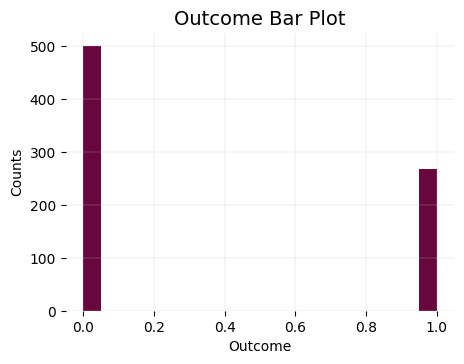

In [322]:
# I change the chart size to smaller, similarly to before
fig = plt.figure(figsize=(5,4))
# I'll use another color here
df['Outcome'].hist(bins=20, color="#68073b")
plt.title('Outcome Bar Plot', fontsize=14)
plt.xlabel('Outcome')
plt.ylabel('Counts')
# I turn off the box and change grid color and thickness for aesthetic reasons
plt.box(on=False)
plt.grid(visible=True, color="#c5c5c5", linewidth=0.2)
plt.tight_layout(pad=2.0)
plt.show()

### Σύμφωνα με κλινικές μελέτες, αν κάποιος ασθενής έχει υψηλά επίπεδα γλυκόζης, είναι πολύ πιθανό να εμφανίσει διαβήτη. Να Δείξετε αν και πως διαπιστώνεται αυτό από τα δεδομένα.

I'll calculate glucose averages for the case where target == 1 (has diabetes) and target == 0 (no diabetes):

In [323]:
df_has_diabetes = df[df['Outcome']==1]
df_no_diabetes = df[df['Outcome']==0]
glucose_avg_diab = df_has_diabetes['Glucose'].mean()
glucose_avg_no_diab = df_no_diabetes['Glucose'].mean()
print(f"The average value of Glucose for diabetes patients is {glucose_avg_diab:.2f}")
print(f"The average value of Glucose for non-diabetes patients is {glucose_avg_no_diab}")

The average value of Glucose for diabetes patients is 141.26
The average value of Glucose for non-diabetes patients is 109.98


Therefore, the hypothesis is confirmed for this dataset.

# Convert DataFrame to Numpy arrays

#### Δημιουργήστε Numpy arrays με inputs (x) και targets (y), όπου στο x περιλαμβάνονται όλα τα χαρακτηριστικά εκτός του outcome και y το outcome.

In [324]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

# this array has only the features (χαρακτηριστικά)
x = input_df.to_numpy()
# and this array has only the target /output
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Split Dataset to Train-Test

#### Στη συνέχεια, χωρίστε το σύνολο δεδομένων σε σύνολα εκπαίδευσης-επικύρωσης (train-validation) με ποσοστό 70-30%, χρησιμοποιώντας ως seed (random state) το 0.

In [325]:
seed = 0
# I change this to 0.3 from 0.1 to get the 70-30% required by the exercise
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(f"Train dataset size is {x_train.shape[0]} values")
print(f"Test dataset size is {x_test.shape[0]} values")

Train dataset size is 537 values
Test dataset size is 231 values


So I've got 537 data points in the training and 231 in the test datasets, respectively.

# Create a Logistic Regression Model

In [326]:
model = LogisticRegression(max_iter=1000, random_state=seed)

# Train model on training set

In [327]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [328]:
y_pred_train = model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred_train)
accuracy_percentage_train = round(accuracy*100, 2)

print(f'The accuracy of the model on the training data is: {accuracy_percentage_train}')

The accuracy of the model on the training data is: 76.54


# Evaluate Model on test set

In [329]:
y_pred_test = model.predict(x_test)
# y_pred

In [330]:
accuracy = accuracy_score(y_test, y_pred_test)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model on the test data is: {accuracy_percentage}')

The accuracy of the model on the test data is: 77.92


#### Τι παρατηρείτε για την ακρίβεια του test set σε σχέση με του train set;

The model is slightly more accurate with the test data compared to the training data, which is strange, as it wasn't trained on it! I wouldn't say it's necessarily a sign of error, but we'll investigate later on when looping over different seeds.



#### Δουλεύει καλά ο ταξινομητής σας για όλες τις ηλικίες; Παρουσιάστε ραβδόγραμμα (bar plot) με την ακρίβεια ανά ομάδα ηλικιών 0 ως 25, 25 ως 50 και >50 του test set.

Για να το διαπιστώσω αυτό, η σκέψη μου είναι να δημιουργήσω ένα df με τις ηλικίες, τα y_test και τα y_pred_test, ώστε να μπορώ να φιλτράρω και να συγκρίνω.

Καταρχήν ας δημιουργήσω τις ομάδες που ζητά η εκφώνηση:

In [331]:
# το κάνω πάλι dataframe
age_df = pd.DataFrame(x_test, columns=column_names[:-1])
age_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22.0
1,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0
2,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0
3,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0
4,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0


In [332]:
# Θα εξετάσω τις ηλικίες μέσω του iterrows
for index, row in age_df.iterrows():
    if row['Age']< 25:
        age_df.loc[index, 'Age_groups'] = '0-25'
    elif row['Age'] < 50:
        age_df.loc[index, 'Age_groups'] = '25-50'
    else:
        age_df.loc[index, 'Age_groups'] = '>50'

age_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_groups
0,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22.0,0-25
1,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0,0-25
2,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0,25-50
3,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,>50
4,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0,25-50


In [333]:
# παίρνω τις τιμές των age groups (θα τα χρειαστώ στο bar chart παρακάτω):
age_groups_name = age_df['Age_groups'].unique()
age_groups_name

array(['0-25', '25-50', '>50'], dtype=object)

In [334]:
# Θα προσθέσω τώρα και τα y_test, y_pred_test
# I first need to convert back to series from array
y_pred_test = pd.Series(y_pred_test, name='y_predicted')
y_test = pd.Series(y_test, name='y_test')
# Και τώρα τα προσθέτω
age_df = pd.concat([age_df, y_test, y_pred_test], axis=1)
age_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_groups,y_test,y_predicted
0,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22.0,0-25,1,1
1,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0,0-25,0,0
2,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0,25-50,0,0
3,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,>50,1,1
4,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0,25-50,0,0


In [335]:
# γίνεται με for loop πιο σωστά
accuracy_0_25 = accuracy_score(age_df['y_test'][age_df['Age_groups']=='0-25'], age_df['y_predicted'][age_df['Age_groups']=='0-25'])
accuracy_25_50 = accuracy_score(age_df['y_test'][age_df['Age_groups']=='25-50'], age_df['y_predicted'][age_df['Age_groups']=='25-50'])
accuracy_50_ = accuracy_score(age_df['y_test'][age_df['Age_groups']=='>50'], age_df['y_predicted'][age_df['Age_groups']=='>50'])
print(f"Accuracy for ages 0-25 is {accuracy_0_25:.2f}")
print(f"Accuracy for ages 25-50 is {accuracy_25_50:.2f}")
print(f"Accuracy for ages >50 is {accuracy_50_:.2f}")

Accuracy for ages 0-25 is 0.84
Accuracy for ages 25-50 is 0.73
Accuracy for ages >50 is 0.88


Οπότε κάνω και το bar chart:

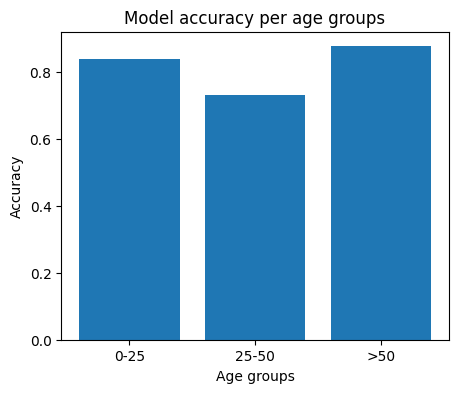

In [336]:
age_accuracies = [accuracy_0_25, accuracy_25_50, accuracy_50_]

fig = plt.figure(figsize=(5,4))
plt.bar(age_groups_name, age_accuracies)
plt.title('Model accuracy per age groups')
plt.xlabel('Age groups')
plt.ylabel('Accuracy')
plt.show()

Άρα η απόδοση του ταξινομητή πέφτει στις ηλικίες 25-50 (73%), ενώ στις άλλες δύο ομάδες είναι >84%.

#### Τι θεωρείτε πως είναι χειρότερο για τον ταξινομητή σας στη συγκεκριμένη εφαρμογή, να προβλέπει ότι κάποιος ασθενής έχει διαβήτη, χωρίς να έχει, ή ότι κάποιος ασθενής δεν έχει διαβήτη, ενώ έχει? Αιτιολογήστε.

Απάντηση: Είναι χειρότερο να προβλέπει πως δεν έχει διαβήτη ενώ έχει, γιατί έτσι δεν θα λάβει τα μέτρα που χρειάζονται για να προστατευθεί. Αντίθετα, μπορεί να προβλέπεται σε περίπτωση θετικού αποτελέσματος να ακολουθούν ιατρικές εξετάσεις προς επιβεβαίωση.

#### Επαναλάβετε τις διαδικασίες 5-6 (με μία for loop), χρησιμοποιώντας seed από 0 ως 9. Υπολογίστε μέσο όρο και τυπική απόκλιση της ακρίβειας σας.

In [337]:
# I'll store accuracy results here
accuracy_results = []

for seed in range(0,10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train, y_train)
  y_pred_test = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred_test)
  accuracy_percentage_test = round(accuracy*100, 2)
  accuracy_results.append(accuracy_percentage_test)

mean_accuracies = np.mean(accuracy_results)
std_accuracies = np.std(accuracy_results)
print(f"The mean accuracy is {mean_accuracies} and the standard error is {std_accuracies:.2f}")

The mean accuracy is 77.27 and the standard error is 1.87


#### Εφαρμόστε κανονικοποίηση των δεδομένων Min-Max: x'=x-xminxmax-xmin (εκτός της μεταβλητής Target).

For this part, I'll use the input_df I created earlier, prior to splitting into x_train and x_test:

In [338]:
print(input_df.min())
type(input_df)

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
dtype: float64


pandas.core.frame.DataFrame

Άρα αυτή η μέθοδος μας δίνει ένα dataframe.

In [339]:
input_df.max()

,0
Pregnancies,17.00
Glucose,199.00
BloodPressure,122.00
SkinThickness,99.00
Insulin,846.00
BMI,67.10
DiabetesPedigreeFunction,2.42
Age,81.00


So these two methods return the max and mix per column. I'll use them below:

In [340]:
X_normalized = (input_df - input_df.min()) / (input_df.max() - input_df.min())
X_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# Feature Importance

The larger the absolute weight value, the better

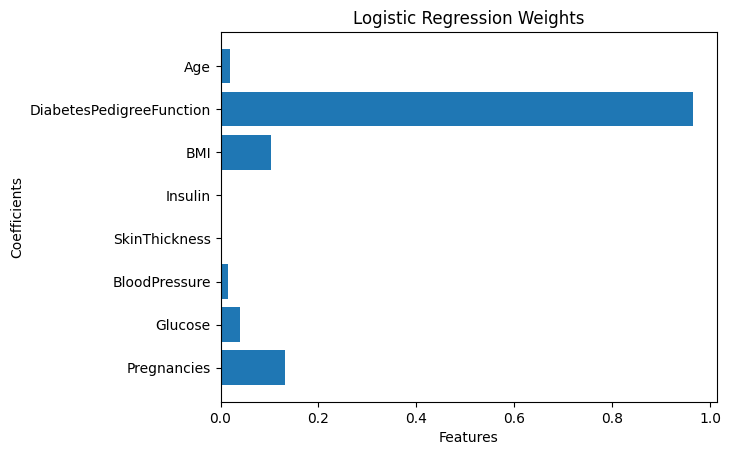

In [341]:
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Οι τρεις πιο σημαντικοί παράγοντες (features) είναι:
- DiabetesPedigreeFunction
- ΒΜΙ
- Pregnancies
Καθώς έχουν το μεγαλύτερο βάρος, και άρα μεταβολή τους κατά 1 μονάδα οδηγεί στη μεγαλύτερη μεταβολή στο output, έναντι των άλλων παραγόντων.

# Evaluate Patients with Age < 40

In [342]:
input_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [343]:
# Create a mask that filters patients with age < 40. Age is found at x_test[:, 7]
age_index = 7
mask_40 = x_test[:, 7] < 40

x_test_40 = x_test[mask_40]
y_test_40 = y_test[mask_40]
y_pred_40 = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_test)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 74.46


## Μέρος 2 – Γραμμική Παλινδρόμηση

#### Φορτώστε το σύνολο δεδομένων diabetes.csv. Δημιουργήστε Numpy arrays με inputs (x) και targets (y), όπου x: (Pregnancies, Blood Pressure, BMI, Age) και y η μεταβλητή Glucose. Xωρίστε το σύνολο δεδομένων σε σύνολα εκπαίδευσης-επικύρωσης (train-validation) με ποσοστό 70-30% με 0 seed.

Τα δεδομένα τα έχω φορτώσει νωρίτερα στο df. Ας δημιουργήσουμε τα δύο νέα arrays:

In [344]:
input_df = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
targets_df = df['Glucose']

x = input_df.to_numpy()
y = targets_df.to_numpy()

print(x)

[[ 6.  72.  33.6 50. ]
 [ 1.  66.  26.6 31. ]
 [ 8.  64.  23.3 32. ]
 ...
 [ 5.  72.  26.2 30. ]
 [ 1.  60.  30.1 47. ]
 [ 1.  70.  30.4 23. ]]


Εφαρμόζω τον διαχωρισμό όμοια με παραπάνω:

In [345]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

#### Χρησιμοποιείστε Γραμμική παλινδρόμηση της scikit-learn, ώστε να προβλέψετε την ποσότητα γλυκόζης στο test set και μετρήστε την ακρίβεια με κατάλληλη μετρική.

Επομένως αυτή τη φορά επιλέγω γραμμική παλινδρόμηση:

In [346]:
model = LinearRegression()

και εκπαιδεύω το μοντέλο (όμοια με την λογιστική παλινδρόμηση):

In [347]:
model.fit(x_train, y_train)

LinearRegression()

In [348]:
# οι προβλέψεις στο training set
y_pred_train = model.predict(x_train)

Εφόσον δεν έχω classification problem, αλλά regression, δεν εφαρμόζεται η μέτρηση της ακρίβειας (accuracy) που χρησιμοποίησα πριν. Παίρνω επομένως το Μέσο Τετραγωνικό Σφάλμα και το Μέσο Απόλυτο Σφάλμα, που ζητάει η εκφώνηση:

In [349]:
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print(f"The training MSE is: {mse_train:.2f}")
print(f"The training MAE is: {mae_train:.2f}")

The training MSE is: 893.29
The training MAE is: 22.74


Στο ερώτημα πώς το μέσο τετραγωνικό σφάλμα είναι τόσο υψηλό, αρκεί να σκεφτούμε πως ένα σφάλμα της τάξης των 30 mg/dL στο τετράγωνο μας δίνει 900.

#### Ποια μετρική είναι καταλληλότερη: Mean Squared Error (MSE) ή Mean Absolute Error (MAE)? Αιτιολογείστε.

Σύμφωνα με την εκφώνηση, το κριτήριο για περαιτέρω εξετάσεις είναι *«Αν είναι πάνω από 170, τότε θα τους προτείνει να προσέλθουν για εξετάσεις»*. Σύμφωνα με τη θεωρία, το μέσο τετραγωνικό σφάλμα τιμωρεί περισσότερο τις αποκλίσεις από τη μέση τιμή, και ίσως ταιριάζει περισσότερο σε μια περίπτωση όπου π.χ. υπέρβαση ενός ορίου θα σήμαινε εγκυμοσύνη. Εδώ, η υπέρβαση του ορίου είναι απλά μια ένδειξη για παραπάνω παρακολούθηση, επομένως δεν θα το επιλέξω. Επιπλέον, με το απόλυτο σφάλμα θα ξέρω από το αποτέλεσμα, πως π.χ. ένας ασθενής έχει εκτιμώμενη γλυκόζη 150 mg/dL με εκτιμώμενη απόκκλιση από την πραγματική τιμή +-22.74 και άρα θα μπορώ να τον εντάξω σε ένα έυρος, να ερμηνεύσω δηλαδή καλύτερα το αποτέλεσμα. Επομένως ως καταλληλότερη μετρική θα θεωρήσω το Μέσο Απόλυτο Σφάλμα.

#### Επαναλάβετε το ερώτημα (2) χρησιμοποιώντας Lasso Regression(Linear + L1). Δοκιμάστε τιμές (0.2, 0.4, 0.6, 0.8, 1.0) για το βάρος  (alpha στην scikit-learn) και κατασκευάστε πινακάκι με την ακρίβεια, χρησιμοποιώντας τη μετρική του ερωτήματος 2.

Ξεκινάω μαζεύοντας τις τιμές που θα δοκιμάσω σε μια λίστα:

In [350]:
alpha_val = [0.2, 0.4, 0.6, 0.8, 1.0]

Εφόσον η μετρική που διάλεξα είναι η MAE:

In [351]:
results_list = []

Όμοια με νωρίτερα,θα φτιάξω μια for loop για να δοκιμάσω αυτές τις 5 τιμές:

In [352]:
lasso_results = []

for alpha in alpha_val:
    # I keep the seed (0) from earlier
    model = Lasso(alpha=alpha,random_state=seed)
    model.fit(x_train, y_train)

    # I'll get my predictions here
    y_pred_test = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred_test)

    # save to the list
    lasso_results.append((alpha, mae))

In [353]:
lasso_results_df = pd.DataFrame(lasso_results, columns=['Alpha_value', 'MAE'])

print(lasso_results_df)

   Alpha_value        MAE
0          0.2  23.594203
1          0.4  23.588415
2          0.6  23.582629
3          0.8  23.576843
4          1.0  23.571058


So the alpha value doesn't seem to be critical to the MAE calculated using the Lasso method.

#### Επαναλάβετε το ερώτημα 2, αφαιρώντας από το X το χαρακτηριστικό με τη χαμηλότερη βαρύτητα (συντελεστή) και συγκρίνεται την επίδοση του μοντέλου σας με το (2). Για να βρείτε αυτό το χαρακτηριστικό, υλοποιήστε το ερώτημα 10, εφαρμόζοντας όμως γραμμική παλινδρόμηση.

Ξεκινάω επομένως από την κανονικοποίηση των τιμών, χρησιμοποιώντας τον τύπο που εφαρμόσαμε και στη λογιστική παλινδρόμηση:

In [354]:
X_normalized_linear = (input_df - input_df.min()) / (input_df.max() - input_df.min())
X_normalized_linear.head()

,Pregnancies,BloodPressure,BMI,Age
0,0.352941,0.590164,0.500745,0.483333
1,0.058824,0.540984,0.396423,0.166667
2,0.470588,0.524590,0.347243,0.183333
3,0.058824,0.540984,0.418778,0.000000
4,0.000000,0.327869,0.642325,0.200000


Και τρέχω ξανά το μοντέλο της γραμμικής παλινδρόμησης:

In [355]:
x = X_normalized_linear.to_numpy()
y = targets_df.to_numpy()

Όμοια με πριν:

In [356]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

In [357]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Και φτιάχνω το διάγραμμα:

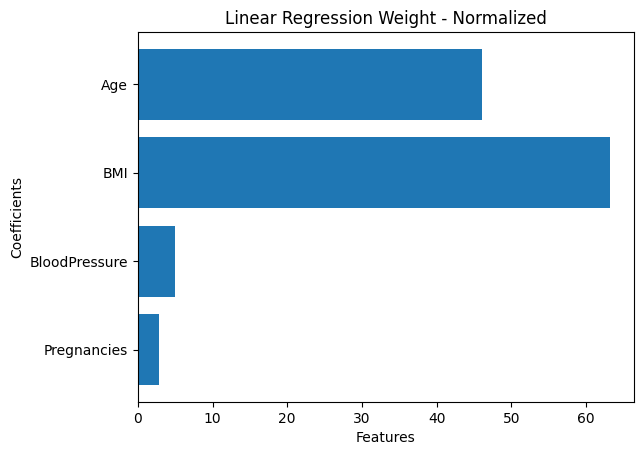

In [358]:
coeffs = model.coef_
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Linear Regression Weight - Normalized')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Επομένως αφαιρώ τις εγκυμοσύνες:

In [359]:
input_df = df[['BloodPressure', 'BMI', 'Age']]
targets_df = df['Glucose']

x = input_df.to_numpy()
y = targets_df.to_numpy()

print(x)

[[72.  33.6 50. ]
 [66.  26.6 31. ]
 [64.  23.3 32. ]
 ...
 [72.  26.2 30. ]
 [60.  30.1 47. ]
 [70.  30.4 23. ]]


Και όμοια με πριν:

In [360]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 3), (537,), (231, 3), (231,))

In [361]:
model_revised = LinearRegression()

In [362]:
model_revised.fit(x_train, y_train)

LinearRegression()

In [363]:
# οι προβλέψεις στο training set
y_pred_train = model_revised.predict(x_train)

In [364]:
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print(f"The training MSE when dropping the pregnancy feature is: {mse_train:.2f}")
print(f"The training MAE when dropping the pregnancy feature is: {mae_train:.2f}")

The training MSE when dropping the pregnancy feature is: 893.53
The training MAE when dropping the pregnancy feature is: 22.74


Το σφάλμα MAE φαίνεται πως παραμένει ίδιο.